In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [98]:
sample_rate = 0.025 
data_len = int(3 / sample_rate) # To get 3 seconds of data, grab this many points.

In [75]:
df = pd.read_csv('Data/addtl_train.csv')

df_more = pd.read_csv('Data/addtl_train.csv')

In [99]:
x_fil = []
button_state = []

for index, row in df.iterrows():
    x_fil.append(row["x_kalhman_filter"])
    button_state.append(row["binary break label"])

for index,row in df_more.iterrows():
    x_fil.append(row["x_kalhman_filter"])
    button_state.append(row["binary break label"])

In [100]:
print(np.shape(x_fil))
print(np.shape(button_state))

(6878,)
(6878,)


In [101]:
X = []
y = []
for i in range(120, len(x_fil)):
    X.append(x_fil[i - data_len:i])
    y.append(button_state[i])

In [102]:
print(np.shape(X))
print(np.shape(y))

input_shape = np.shape(X[0])

# print(input_shape)

X = tf.expand_dims(X, axis = -1)

print(np.shape(X))

(6758, 120)
(6758,)
(6758, 120, 1)


In [103]:
X = np.asarray(X)
y = np.asarray(y)

In [104]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 16,
                           strides = 1,
                           padding = 'valid',
                           activation = 'relu',
                           kernel_size = (4, 1),
                           input_shape = (120, 1, 1)
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, batch_size = 64, epochs = 100, verbose = 1)


Epoch 1/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8522
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8537
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8537
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8537
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8537
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 0.3061 - accuracy: 0.8542
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8646
Epoch 8/100
106/106 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.8686
Epoch 9/100
106/106 [==============================] - 0s 1ms/step - loss: 0.2833 - accuracy: 0.8775
Epoch 10/100
106/106 [==============================] - 0s 1ms/step - loss: 0.2778 - accura

In [105]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 117, 1, 16)        80        
                                                                 
 flatten_14 (Flatten)        (None, 1872)              0         
                                                                 
 dense_28 (Dense)            (None, 32)                59936     
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 60,049
Trainable params: 60,049
Non-trainable params: 0
_________________________________________________________________


In [106]:
print(np.shape(X[0]))

(120, 1)


In [107]:
df_more = pd.read_csv('Data/train_to_input_into_model.csv')

x_fil = []
button_state = []

for index,row in df_more.iterrows():
    x_fil.append(row["x_kalhman_filter"])
    button_state.append(row["binary break label"])

X_test = []
y_test = []
for i in range(120, len(x_fil)):
    X_test.append(x_fil[i - data_len:i])
    y_test.append(button_state[i])

X_test = tf.expand_dims(X_test, axis = -1)


In [108]:
predictions = model.predict(X_test)

for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

84/84 [==============================] - 0s 463us/step


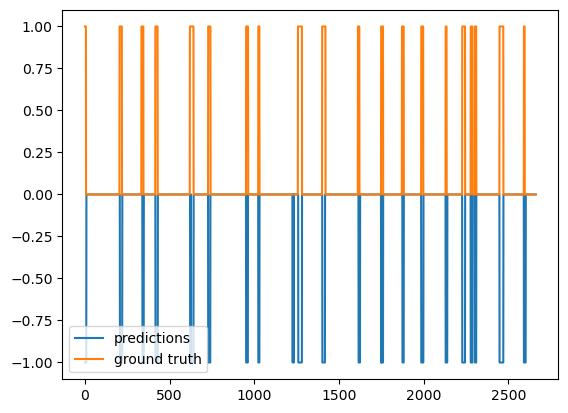

In [109]:
plt.plot([x*-1 for x in predictions], label ='predictions')

plt.plot(y_test,label = 'ground truth')
plt.legend()

In [110]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: /var/folders/c4/p5wzdb355zbfj4cn_pqg03c80000gn/T/tmpf0e7d3db/assets


INFO:tensorflow:Assets written to: /var/folders/c4/p5wzdb355zbfj4cn_pqg03c80000gn/T/tmpf0e7d3db/assets
2023-04-30 18:13:12.575088: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-04-30 18:13:12.575106: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.


Model is 242712 bytes


2023-04-30 18:13:12.575205: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/c4/p5wzdb355zbfj4cn_pqg03c80000gn/T/tmpf0e7d3db
2023-04-30 18:13:12.575937: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2023-04-30 18:13:12.575943: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/c4/p5wzdb355zbfj4cn_pqg03c80000gn/T/tmpf0e7d3db
2023-04-30 18:13:12.578496: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-04-30 18:13:12.606262: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /var/folders/c4/p5wzdb355zbfj4cn_pqg03c80000gn/T/tmpf0e7d3db
2023-04-30 18:13:12.615391: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 40184 microseconds.


In [111]:
!echo "const unsigned char model[] = {" > model.h
!cat gesture_model.tflite | xxd -i      >> model.h
!echo "};"                              >> model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
# print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 1,496,758 bytes.


In [94]:
from sklearn import metrics 

In [95]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)



In [96]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

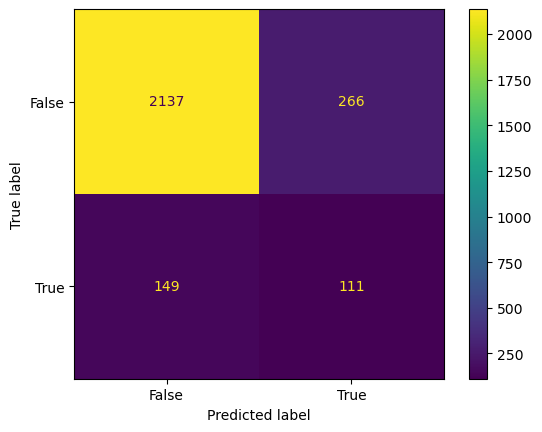

In [97]:
cm_display.plot()
plt.show()

In [116]:
df = pd.read_csv('Data/data.csv') 

In [117]:
for index, row in df.iterrows():
    if row["button_state"] <= 100:
        row["button_state"] = int(1)
    else:
        row["button_state"] = int(0)

In [ ]:
X_test = []

for index, row in df.iterrows():
    